# Proposal Final Figure Generation (SST's at M2)

After a number of discussions and some back and forth, PJS wants the following 3 panel figure:

The bottom panel will be M2 sst for all years.  We will use the 11 m temperatures for the winter deployments so we have data for the whole year.  These lines would all be grey to show the range in temperature and then if we can add a black line that represents the mean.

The second panel will be just 2019 using the 2018 winter mooring temperature at 11 m and 2019 winter mooring temperature at 11m and the 2019 summer mooring (or the Prawler sst) to create an annual time series.  This will be compared with JPL SST.

the top panel will be April - October for the IF1, IF4, IF5 and IF9 (50m, 42-43m, and 38m  or thereabouts) and the sst at IF1.  We wont show the NOAA OISST data, just the in situ stuff.

In [1]:
from erddapy import ERDDAP
import xarray as xa
import datetime
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import cmocean 
import seaborn as sns

## Year over Year plot at M2 

- summer near suface (bsm moorings)
- winter near 11m

In [2]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

df = pd.read_csv(e.get_search_url(response='csv', search_for='bsm2'))


dfm2 = {}
for dataset_id in sorted(df['Dataset ID'].values):
    print(f'{dataset_id}')
    if  not ('gridded' in dataset_id) and not ('Met' in dataset_id):
        try:
            e = ERDDAP(server=server_url,
                protocol='tabledap',
                response='csv'
            )
            e.dataset_id=dataset_id
        except HTTPError:
            print('Failed to generate url {}'.format(dataset_id))
            continue
        try:
            dftemp = e.to_pandas(
                                index_col='time (UTC)',
                                parse_dates=True,
                                skiprows=(1,)  # units information can be dropped.
                                )
            dftemp.columns = [x[1].split()[0] for x in enumerate(dftemp.columns)]

            ##resample as daily data 
            dfm2.update({dataset_id: dftemp})
        except:
            pass

1hr_gridded_datasets_Mooring_00bsm2a_final
1hr_gridded_datasets_Mooring_01bsm2a_final
1hr_gridded_datasets_Mooring_02bsm2a_final
1hr_gridded_datasets_Mooring_03bsm2a_final
1hr_gridded_datasets_Mooring_04bsm2a_final
1hr_gridded_datasets_Mooring_05bsm2a_final
1hr_gridded_datasets_Mooring_06bsm2a_final
1hr_gridded_datasets_Mooring_07bsm2a_final
1hr_gridded_datasets_Mooring_08bsm2a_final
1hr_gridded_datasets_Mooring_09bsm2a_final
1hr_gridded_datasets_Mooring_10bsm2a_final
1hr_gridded_datasets_Mooring_11bsm2a_final
1hr_gridded_datasets_Mooring_12bsm2a_final
1hr_gridded_datasets_Mooring_13bsm2a_final
1hr_gridded_datasets_Mooring_14bsm2a_final
1hr_gridded_datasets_Mooring_15bsm2a_final
1hr_gridded_datasets_Mooring_16bsm2a_final
1hr_gridded_datasets_Mooring_17bsm2a_final
1hr_gridded_datasets_Mooring_18bsm2a_final
1hr_gridded_datasets_Mooring_19bsm2a_final
datasets_Met_00bsm2a_final
datasets_Met_01bsm2a_final
datasets_Met_02bsm2a_final
datasets_Met_03bsm2a_final
datasets_Met_04bsm2a_final
datas

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


datasets_Mooring_18bsm2a_preliminary
datasets_Mooring_19bsm2a_final
datasets_Mooring_19bsm2a_preliminary
datasets_Mooring_95bsm2_final
datasets_Mooring_95bsm2a_final
datasets_Mooring_96bsm2a_final
datasets_Mooring_97bsm2a_final
datasets_Mooring_98bsm2b_final
datasets_Mooring_99bsm2a_final


In [3]:
sst_m2 = pd.DataFrame()
for mooring in sorted(list(dfm2.keys())):
    if not mooring in ['datasets_Mooring_14bsm2a_preliminary','datasets_Mooring_15bsm2a_preliminary','datasets_Mooring_16bsm2a_preliminary','datasets_Mooring_17bsm2a_preliminary','datasets_Mooring_18bsm2a_preliminary','datasets_Mooring_19bsm2a_preliminary']:
#         print(mooring)
        dint = np.nan
        try:
            dint = dfm2[mooring].depth.unique()[(dfm2[mooring].depth.unique() > 0)].min()
#             print(dint)
            if np.isnan(dfm2[mooring][(dfm2[mooring].depth == dint)].temperature).all():
                dint = dfm2[mooring].depth.unique()[(dfm2[mooring].depth.unique() > 3)].min()
            sst_m2 = pd.concat([sst_m2,dfm2[mooring][(dfm2[mooring].depth == dint)].dropna(subset=['temperature'],axis=0)[['depth','temperature']]])
        except:
            print(f'{mooring} failed')

datasets_Mooring_09bsp2a_final failed


In [4]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

df = pd.read_csv(e.get_search_url(response='csv', search_for='bs2c'))


dfm2c = {}
for dataset_id in sorted(df['Dataset ID'].values):
    print(f'{dataset_id}')
    if  not ('gridded' in dataset_id) and not ('Met' in dataset_id) and not ('EcoFOCI_Bering_Sea_timeseries_data' in dataset_id) and not ('foci_rehosted_e932_978b_9e7c' in dataset_id):
        try:
            e = ERDDAP(server=server_url,
                protocol='tabledap',
                response='csv'
            )
            e.dataset_id=dataset_id
        except HTTPError:
            print('Failed to generate url {}'.format(dataset_id))
            continue
        try:
            dftemp = e.to_pandas(
                                index_col='time (UTC)',
                                parse_dates=True,
                                skiprows=(1,)  # units information can be dropped.
                                )
            dftemp.columns = [x[1].split()[0] for x in enumerate(dftemp.columns)]

            ##resample as daily data 
            dfm2c.update({dataset_id: dftemp})
        except:
            pass

1hr_gridded_datasets_Mooring_01bs2c_final
1hr_gridded_datasets_Mooring_02bs2c_final
1hr_gridded_datasets_Mooring_03bs2c_final
1hr_gridded_datasets_Mooring_04bs2c_final
1hr_gridded_datasets_Mooring_05bs2c_final
1hr_gridded_datasets_Mooring_06bs2c_final
1hr_gridded_datasets_Mooring_07bs2c_final
1hr_gridded_datasets_Mooring_08bs2c_final
1hr_gridded_datasets_Mooring_09bs2c_final
1hr_gridded_datasets_Mooring_10bs2c_final
1hr_gridded_datasets_Mooring_11bs2c_final
1hr_gridded_datasets_Mooring_12bs2c_final
1hr_gridded_datasets_Mooring_13bs2c_final
1hr_gridded_datasets_Mooring_14bs2c_final
1hr_gridded_datasets_Mooring_15bs2c_final
1hr_gridded_datasets_Mooring_16bs2c_final
1hr_gridded_datasets_Mooring_17bs2c_final
1hr_gridded_datasets_Mooring_18bs2c_final
CTD_aq1301_final
EcoFOCI_Bering_Sea_timeseries_data
datasets_Mooring_01bs2c_final
datasets_Mooring_02bs2c_final
datasets_Mooring_03bs2c_final
datasets_Mooring_04bs2c_final
datasets_Mooring_05bs2c_final
datasets_Mooring_06bs2c_final
datasets_Moo

/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


datasets_Mooring_97bs2c_final
datasets_Mooring_98bs2c_final
datasets_Mooring_99bs2c_final
foci_rehosted_e932_978b_9e7c


In [5]:
sst_m2c = pd.DataFrame()
for mooring in sorted(list(dfm2c.keys())):
    if not mooring in ['datasets_Mooring_99bs2c_final','datasets_Mooring_09bs2c_final','datasets_Mooring_14bs2c_preliminary','datasets_Mooring_15bs2c_preliminary','datasets_Mooring_16bs2c_preliminary','datasets_Mooring_17bs2c_preliminary','datasets_Mooring_18bs2c_preliminary']:
        print(mooring)
        dint = np.nan
        try:
            dint = dfm2c[mooring].depth.unique()[(dfm2c[mooring].depth.unique() > 0)].min()
            print(dint)
            if np.isnan(dfm2c[mooring][(dfm2c[mooring].depth == dint)].temperature).all():
                dint = dfm2c[mooring].depth.unique()[(dfm2c[mooring].depth.unique() > 3)].min()
            sst_m2c = pd.concat([sst_m2c,dfm2c[mooring][(dfm2c[mooring].depth == dint)].dropna(subset=['temperature'],axis=0)[['depth','temperature']]])
        except:
            print(f'{mooring} failed')

CTD_aq1301_final
CTD_aq1301_final failed
datasets_Mooring_01bs2c_final
6.0
datasets_Mooring_02bs2c_final
11.0
datasets_Mooring_03bs2c_final
11.0
datasets_Mooring_04bs2c_final
11.0
datasets_Mooring_05bs2c_final
10.0
datasets_Mooring_06bs2c_final
10.0
datasets_Mooring_07bs2c_final
9.0
datasets_Mooring_08bs2c_final
10.0
datasets_Mooring_10bs2c_final
9.0
datasets_Mooring_11bs2c_final
12.0
datasets_Mooring_12bs2c_final
11.0
datasets_Mooring_13bs2c_final
11.0
datasets_Mooring_14bs2c_final
9.019
datasets_Mooring_15bs2c_final
11.0
datasets_Mooring_16bs2c_final
9.0
datasets_Mooring_17bs2c_final
11.0
datasets_Mooring_18bs2c_final
11.0
datasets_Mooring_96bs2c_final
10.0
datasets_Mooring_97bs2c_final
10.0
datasets_Mooring_98bs2c_final
10.0


In [6]:
m2_all_sst = pd.concat([sst_m2,sst_m2c])
m2_all_sst.sort_index(inplace=True)

In [7]:
m2_hr_all_sst = m2_all_sst.resample('1H').mean()

In [8]:
m2_hr_all_sst['year'] = m2_hr_all_sst.index.year
m2_hr_all_sst['doy'] = m2_hr_all_sst.index.day_of_year

(0.0, 365.0)

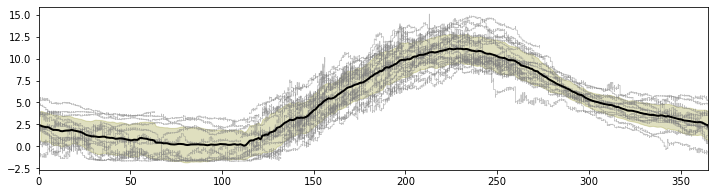

In [10]:
fig, ax = plt.subplots(figsize=(12, 3))
for year in m2_hr_all_sst.groupby(m2_hr_all_sst.index.year).groups.keys():
    ax.plot(m2_hr_all_sst.groupby(m2_hr_all_sst.index.year).get_group(year).doy, 
            m2_hr_all_sst.groupby(m2_hr_all_sst.index.year).get_group(year).temperature,linewidth=.75,color='grey',alpha=.5)
ax.plot(m2_hr_all_sst.groupby(m2_hr_all_sst.index.day_of_year).mean().doy,
       m2_hr_all_sst.groupby(m2_hr_all_sst.index.day_of_year).mean().temperature,linewidth=2,color='black')
ax.fill_between(m2_hr_all_sst.groupby(m2_hr_all_sst.index.day_of_year).mean().doy, 
               m2_hr_all_sst.groupby(m2_hr_all_sst.index.day_of_year).mean().temperature-m2_hr_all_sst.groupby(m2_hr_all_sst.index.day_of_year).std().temperature,
               m2_hr_all_sst.groupby(m2_hr_all_sst.index.day_of_year).mean().temperature+m2_hr_all_sst.groupby(m2_hr_all_sst.index.day_of_year).std().temperature,
               color='olive',alpha=.25)
ax.set_xlim([0,365])

The above plot shows a band for +/-1 STDev in olive.  Years without data in the upper 10m where omitted (1999 and 2009)

## 2019 nearsurface SST vs JPL.MUR M2 data

In [11]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

df = pd.read_csv(e.get_search_url(response='csv', search_for='19bsitaepr final'))

dfpr={}
for dataset_id in ['datasets_Mooring_19bsitaepr2a_final','datasets_Mooring_18bs2c_final',
                   'datasets_Mooring_18bsm2a_final','datasets_Mooring_17bs2c_final',
                   'datasets_Mooring_17bsm2a_final','datasets_Mooring_16bs2c_final',
                   'datasets_Mooring_16bsm2a_final','datasets_Mooring_15bs2c_final',
                   'datasets_Mooring_15bsm2a_final','datasets_Mooring_14bs2c_final']:
    print(f'{dataset_id}')
    try:
        e = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        e.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))
        continue
    try:
        dftemp = e.to_pandas(
                            index_col='time (UTC)',
                            parse_dates=True,
                            skiprows=(1,)  # units information can be dropped.
                            )
        dftemp.columns = [x[1].split()[0] for x in enumerate(dftemp.columns)]

        ##resample as daily data 
        dfpr.update({dataset_id: dftemp})
    except:
        pass

datasets_Mooring_19bsitaepr2a_final
datasets_Mooring_18bs2c_final
datasets_Mooring_18bsm2a_final


/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


datasets_Mooring_17bs2c_final
datasets_Mooring_17bsm2a_final
datasets_Mooring_16bs2c_final
datasets_Mooring_16bsm2a_final
datasets_Mooring_15bs2c_final
datasets_Mooring_15bsm2a_final
datasets_Mooring_14bs2c_final


In [12]:
df2019 = pd.read_csv('/Users/bell/ecoraid/2019/Moorings/19bs2c/initial_archive/19bs2c_s56_0011m.csv',parse_dates=True,index_col='time')

(25771680.0, 26295840.0)

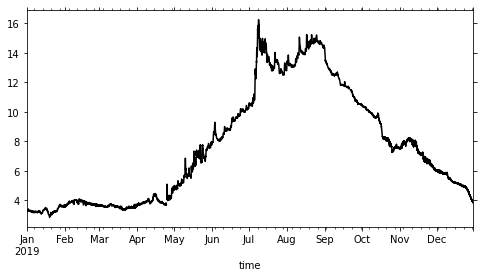

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].temperature.plot(ax=ax,c='k')
dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].temperature.plot(ax=ax,c='k')
df2019.loc['2019-9-22':'2019'].temperature.plot(ax=ax,c='k')
ax.set_xlim('2019-1-1','2019-12-31')

In [14]:
#mur files
sstfiles = '/Volumes/MobileSSD/in_and_outbox/data_sets/podaac_MUR/M2_highres/'
mdf_hres = xa.open_mfdataset(sstfiles+'201[56789]*.nc')

OSError: no files to open

In [ ]:
m2point=[56.867,180+(180-164.05)]
m2pointW=[56.867,-164.05]
mdf_hres_m2 = mdf_hres.sel(lat=m2pointW[0], lon=m2pointW[1], method="nearest").load()


In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').mean().temperature.plot(ax=ax,c='k',label='')
(dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').mean()+dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').std()).temperature.plot(ax=ax,c='k',linewidth=2,label='')
(dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').mean()-dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').std()).temperature.plot(ax=ax,c='k',linewidth=2,label='')
dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').mean().temperature.plot(ax=ax,c='k',label='')
(dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').mean()+dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').std()).temperature.plot(ax=ax,c='k',linewidth=2,label='')
(dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').mean()-dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').std()).temperature.plot(ax=ax,c='k',linewidth=2,label='')

df2019.loc['2019-9-22':'2019'].resample('1D').mean().temperature.plot(ax=ax,c='k',label='EcoFOCI M2 ')
(df2019.loc['2019-9-22':'2019'].resample('1D').mean()+df2019.loc['2019-9-22':'2019'].resample('1D').std()).temperature.plot(ax=ax,c='k',linewidth=2,label='')
(df2019.loc['2019-9-22':'2019'].resample('1D').mean()-df2019.loc['2019-9-22':'2019'].resample('1D').std()).temperature.plot(ax=ax,c='k',linewidth=2,label='')

(mdf_hres_m2.to_dataframe().drop(columns=['lat','lon']).analysed_sst-273.15).resample('1D').mean().plot(ax=ax,label='JPL-MUR SST@M2',c='r')

ax.set_xlim('2019-1-1','2019-12-31')
ax.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').mean().temperature.plot(ax=ax,c='k',label='')
(dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').min()).temperature.plot(ax=ax,c='k',linewidth=2,label='')
(dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').max()).temperature.plot(ax=ax,c='k',linewidth=2,label='')
dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').mean().temperature.plot(ax=ax,c='k',label='')
(dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').min()).temperature.plot(ax=ax,c='k',linewidth=2,label='')
(dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').max()).temperature.plot(ax=ax,c='k',linewidth=2,label='')

df2019.loc['2019-9-22':'2019'].resample('1D').mean().temperature.plot(ax=ax,c='k',label='EcoFOCI M2 ')
(df2019.loc['2019-9-22':'2019'].resample('1D').min()).temperature.plot(ax=ax,c='k',linewidth=2,label='')
(df2019.loc['2019-9-22':'2019'].resample('1D').max()).temperature.plot(ax=ax,c='k',linewidth=2,label='')

(mdf_hres_m2.to_dataframe().drop(columns=['lat','lon']).analysed_sst-273.15).resample('1D').mean().plot(ax=ax,label='JPL-MUR SST@M2',c='r')

ax.set_xlim('2019-1-1','2019-12-31')
ax.legend()


## Difference between JPL-M2 (2016-2019 - annually STD and Mean)

In [ ]:
#less lazy than above - need actual differences now
temp = dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12]['2019':'2019'].resample('1D').mean().temperature
temp2 = dfpr['datasets_Mooring_19bsitaepr2a_final'][dfpr['datasets_Mooring_19bsitaepr2a_final'].depth==1].resample('1D').mean().temperature
temp = temp.tz_localize(None)
temp2 = temp2.tz_localize(None)

M2_Temp_2019 = pd.concat([temp,temp2,df2019.loc['2019-9-22':'2019'].resample('1D').mean().temperature])

In [ ]:
M2_Temp_2019

In [ ]:
temp = dfpr['datasets_Mooring_17bs2c_final'][dfpr['datasets_Mooring_17bs2c_final'].depth==12]['2018':'2018'].resample('1D').mean().temperature
temp3 = dfpr['datasets_Mooring_18bs2c_final'][dfpr['datasets_Mooring_18bs2c_final'].depth==12].resample('1D').mean().temperature
temp2 = dfpr['datasets_Mooring_18bsm2a_final'][dfpr['datasets_Mooring_18bsm2a_final'].depth==4].resample('1D').mean().temperature
temp = temp.tz_localize(None)
temp2 = temp2.tz_localize(None)
temp3 = temp3.tz_localize(None)

In [ ]:
temp = dfpr['datasets_Mooring_16bs2c_final'][dfpr['datasets_Mooring_16bs2c_final'].depth==10]['2017':'2017'].resample('1D').mean().temperature
temp3 = dfpr['datasets_Mooring_17bs2c_final'][dfpr['datasets_Mooring_17bs2c_final'].depth==12].resample('1D').mean().temperature
temp2 = dfpr['datasets_Mooring_17bsm2a_final'][dfpr['datasets_Mooring_17bsm2a_final'].depth==4].resample('1D').mean().temperature
temp = temp.tz_localize(None)
temp2 = temp2.tz_localize(None)
temp3 = temp3.tz_localize(None)

M2_Temp_2017 = pd.concat([temp,temp2,temp3])

In [ ]:
temp = dfpr['datasets_Mooring_15bs2c_final'][dfpr['datasets_Mooring_15bs2c_final'].depth==12]['2016':'2016'].resample('1D').mean().temperature
temp3 = dfpr['datasets_Mooring_16bs2c_final'][dfpr['datasets_Mooring_16bs2c_final'].depth==10].resample('1D').mean().temperature
temp2 = dfpr['datasets_Mooring_16bsm2a_final'][dfpr['datasets_Mooring_16bsm2a_final'].depth==4].resample('1D').mean().temperature
temp = temp.tz_localize(None)
temp2 = temp2.tz_localize(None)
temp3 = temp3.tz_localize(None)

M2_Temp_2016 = pd.concat([temp,temp2,temp3])

In [ ]:
temp = dfpr['datasets_Mooring_14bs2c_final'][dfpr['datasets_Mooring_14bs2c_final'].depth==9.019]['2015':'2015'].resample('1D').mean().temperature
temp3 = dfpr['datasets_Mooring_15bs2c_final'][dfpr['datasets_Mooring_15bs2c_final'].depth==12].resample('1D').mean().temperature
temp2 = dfpr['datasets_Mooring_15bsm2a_final'][dfpr['datasets_Mooring_15bsm2a_final'].depth==4].resample('1D').mean().temperature
temp = temp.tz_localize(None)
temp2 = temp2.tz_localize(None)
temp3 = temp3.tz_localize(None)

M2_Temp_2015 = pd.concat([temp,temp2,temp3])

SST_MUR = (mdf_hres_m2.to_dataframe().drop(columns=['lat','lon']).analysed_sst-273.15).resample('1D').mean()

In [ ]:
fig, ax = plt.subplots(figsize=(12, 3))
(M2_Temp_2019 - SST_MUR['2019']).plot(label='2019 M2-JPL/MUR')
(M2_Temp_2018 - SST_MUR['2018']).plot(label='2018 M2-JPL/MUR')
(M2_Temp_2017 - SST_MUR['2017']).plot(label='2017 M2-JPL/MUR')
(M2_Temp_2016 - SST_MUR['2016']).plot(label='2016 M2-JPL/MUR')
(M2_Temp_2015 - SST_MUR['2015']).plot(label='2015 M2-JPL/MUR')

## IF station plots

In [15]:
server_url='http://akutan.pmel.noaa.gov:8080/erddap'

e = ERDDAP(server=server_url)

df = pd.read_csv(e.get_search_url(response='csv', search_for='IF -ADCP -CTD -merged -Drifters -PopUP -ICOADS -12a'))


dfs = {}
for dataset_id in sorted(df['Dataset ID'].values):
    if ('if' in dataset_id) and not ('10' in dataset_id):
        print(dataset_id)
        try:
            e = ERDDAP(server=server_url,
                protocol='tabledap',
                response='csv'
            )
            e.dataset_id=dataset_id
        except HTTPError:
            print('Failed to generate url {}'.format(dataset_id))
            continue
        try:
            dftemp = e.to_pandas(
                                index_col='time (UTC)',
                                parse_dates=True,
                                skiprows=(1,)  # units information can be dropped.
                                )
            dftemp.columns = [x[1].split()[0] for x in enumerate(dftemp.columns)]
            
            ##resample as daily data 
            dfs.update({dataset_id: dftemp})
        except:
            pass

datasets_Met_97ifm1a_final
datasets_Met_98ifm1a_final
datasets_Mooring_97if4a_final
datasets_Mooring_97if5a_final
datasets_Mooring_97if6a_final


/Users/bell/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3361: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


datasets_Mooring_97if7a_final
datasets_Mooring_97if8a_final
datasets_Mooring_97if9a_final
datasets_Mooring_97ifm1a_final
datasets_Mooring_97ift2a_final
datasets_Mooring_97ift3a_final
datasets_Mooring_98if4a_final
datasets_Mooring_98if5a_final
datasets_Mooring_98if6a_final
datasets_Mooring_98if7a_final
datasets_Mooring_98if8a_final
datasets_Mooring_98if9a_final
datasets_Mooring_98ifm1a_final
datasets_Mooring_99if2a_final


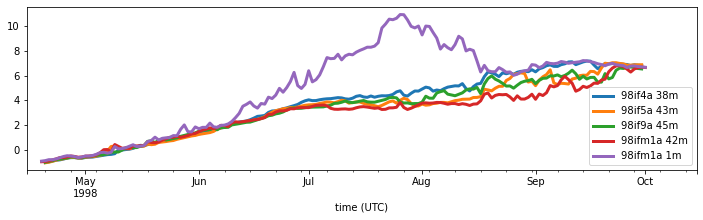

In [21]:
#pull max or min depth from moored data
fig, ax = plt.subplots(figsize=(12, 3))
for dataset_id in sorted(dfs.keys()):
    if ('98if4a' in dataset_id) or ('98ifm1a' in dataset_id) or ('98if5a' in dataset_id) or ('98if9a' in dataset_id):
        try:
            btmdepth = max(dfs[dataset_id].groupby('depth').groups.keys())
            if btmdepth <0:
                btmdepth = min(list(dfs[dataset_id].groupby('depth').groups.keys())[1:])

            (dfs[dataset_id][dfs[dataset_id].depth == btmdepth]).resample('1D').mean().temperature.plot(ax=ax,
                                                                                                        label=dataset_id.split('_')[-2]+' '+str(int(btmdepth))+'m',
                                                                                                       linewidth=3)

        except:
            pass
    if ('98ifm1a' in dataset_id):
        try:
            btmdepth = min(dfs[dataset_id].groupby('depth').groups.keys())
            if btmdepth <0:
                btmdepth = min(list(dfs[dataset_id].groupby('depth').groups.keys())[1:])

            (dfs[dataset_id][dfs[dataset_id].depth == btmdepth]).resample('1D').mean().temperature.plot(ax=ax,
                                                                                                        label=dataset_id.split('_')[-2]+' '+str(int(btmdepth))+'m',
                                                                                                        linewidth=3)


        except:
            pass

plt.xlim([datetime.date(1998,4,15),datetime.date(1998,10,15)])

fig.legend(bbox_to_anchor=(.9,0.125), loc="lower right")